In [3]:
import numpy as np

In [4]:
def hump_fn(max=.7, steps=100):
    lin = np.concatenate([np.linspace(0, max, steps // 2), np.linspace(max, 0, steps // 2)])
    lin = np.sqrt(lin)
    return lin

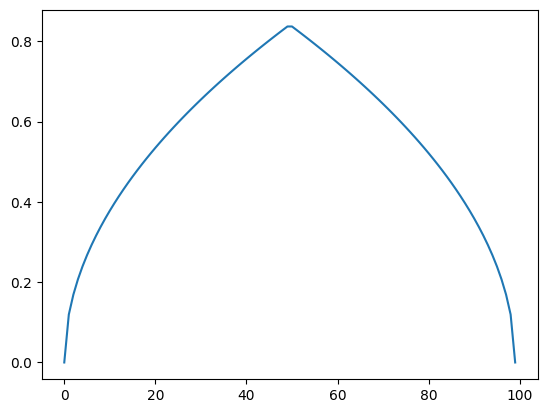

In [5]:
import matplotlib.pyplot as plt
plt.plot(hump_fn())

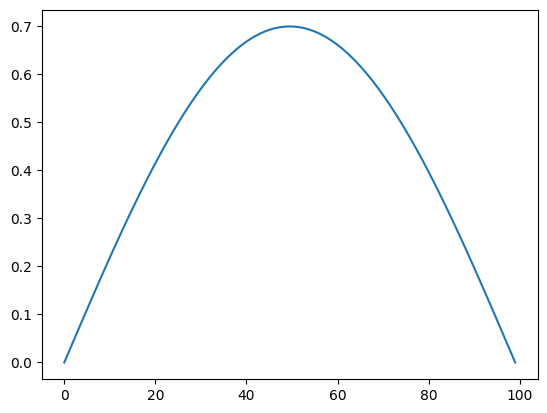

In [6]:
def cycle(max=0.7, steps=100):
    return np.sin(np.linspace(0, np.pi, steps)) * max
plt.plot(cycle())

In [55]:
import torch

timesteps = 1000
ts = torch.linspace(0, 1, timesteps + 1)

def theta_from_t(t, max=1.0):
    return torch.sin(t * torch.pi) * max * torch.pi / 2

def phi_from_t(t: torch.tensor, steepness=2):
    if not isinstance(t, torch.Tensor):
        t = torch.tensor(t)
    # divide by 0?
    ones_in_t = torch.isclose(t, torch.ones_like(t))
    out = torch.zeros_like(t)
    t = torch.where(ones_in_t, 0, t)
    # https://stats.stackexchange.com/questions/214877/is-there-a-formula-for-an-s-shaped-curve-with-domain-and-range-0-1
    out = 1 / (1 + (t/(1-t)) ** -2) * torch.pi / 2
    out = torch.where(ones_in_t, torch.pi/2, out)
    return out

In [56]:
phi_from_t(1)

tensor(1.5708)

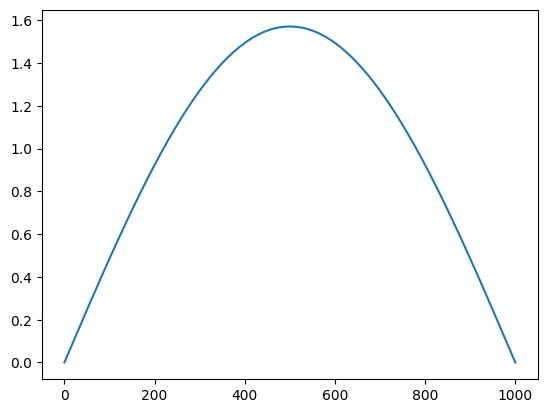

In [57]:
plt.plot(theta_from_t(ts).numpy())

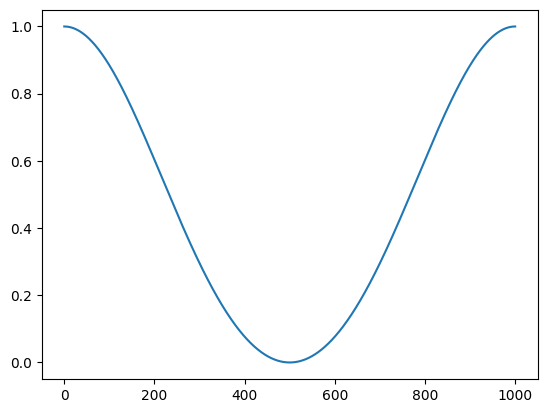

In [19]:
plt.plot(torch.cos(theta_from_t(ts)).numpy())

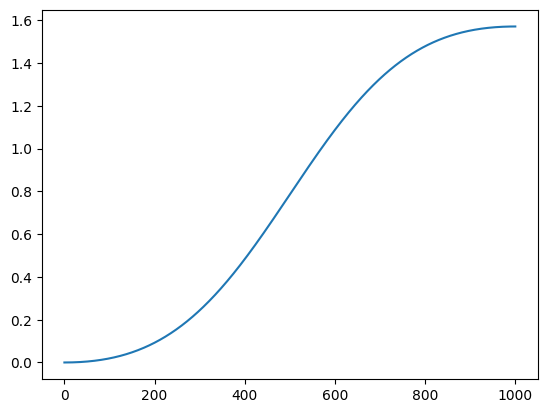

In [20]:
plt.plot(phi_from_t(ts).numpy())

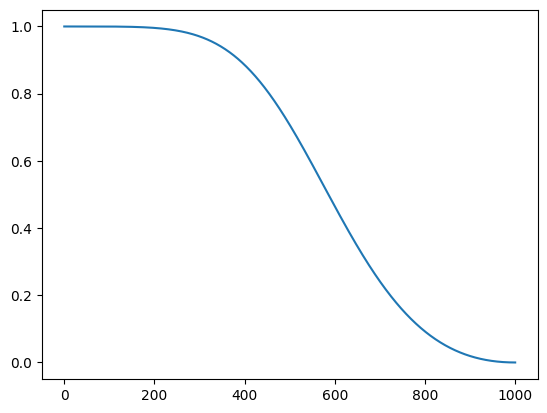

In [21]:
plt.plot(torch.cos(phi_from_t(ts)).numpy())

In [16]:
r = torch.rand(5, 3, 16, 16)
r[:, 0, 0, 0].shape

torch.Size([5])

In [22]:
torch.linspace(0, 1, 1001)[:, None, None, None].shape

torch.Size([1001, 1, 1, 1])

In [59]:
from model.network.modules import AngularFourierFeatures

aff = AngularFourierFeatures(32)

AttributeError: cannot assign parameters before Module.__init__() call